In [12]:
import numpy as np
import matplotlib.pyplot as plt
import visa
import time
import datetime as dt
import importlib.util
spec = importlib.util.spec_from_file_location("FS740", "driver/FS740.py")
FS740 = importlib.util.module_from_spec(spec)
spec.loader.exec_module(FS740)

ModuleNotFoundError: No module named 'FS740'

In [14]:
rm = visa.ResourceManager()
clock_addr = 'COM4'
protocol = 'RS232'

In [15]:
def chunks(l,n):
    lst = []
    for i in range(0, len(l), n):
        lst.append(l[i:i+n])
    return lst

id | snr | azimuth | elevation
 8 |  25 |     161 |        81
27 |  16 |      54 |        59
 7 |  36 |     309 |        55
 9 |  21 |     236 |        37
11 |  28 |     179 |        25
23 |  24 |     205 |        24
30 |  21 |     309 |        22
18 |  37 |     153 |        19
signal : 26


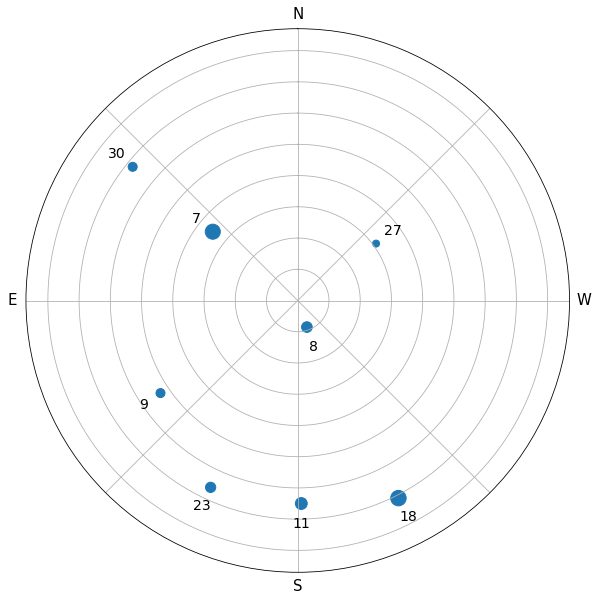

In [20]:
remap_radial = lambda r: 90 - r
with FS740.FS740(rm, clock_addr, protocol) as clock:
    response = clock.GPSSatelliteTrackingStatus()

vals = chunks(response.split(','),8)
    
ids, signal, elevation, azimuth = zip(*[(int(val[0]), int(val[4]), int(val[5]), int(val[6])) for val in vals if (val[3] =='0') and (val[0] != '0')])
    
fig, ax = plt.subplots(figsize = (10,10), subplot_kw = {'projection': 'polar'})

ax.set_rmax(90)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
# sc = ax.scatter(np.array(azimuth)*np.pi/180, elevation, np.array(signal)**1.6, c = signal, vmin = 0, vmax = 60,
#                 cmap = 'viridis')
sc = ax.scatter(np.array(azimuth)*np.pi/180, list(map(remap_radial, elevation)), np.array(signal)**1.9/4
                )

ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''], fontsize = 15)
ax.set_yticklabels([])
[ax.annotate(str(idS), xy = (azi*np.pi/180, remap_radial(ele)+6.7),
            verticalalignment = 'center', horizontalalignment = 'center', 
            fontsize = 14) for idS, azi, ele in zip(ids, azimuth, elevation)]
# cbar = fig.colorbar(sc);
# cbar.ax.set_ylabel('dBHz', fontsize = 15)

header = 'id | snr | azimuth | elevation'
print(header)
print('='*len(header))
for idS, sig, azi, ele in zip(ids, signal, azimuth, elevation):
    print('{0:2d} | {1:3d} | {2:7d} | {3:9d}'.format(idS, sig, azi, ele))
print('='*len(header))
print('signal : {0:d}'.format(int(np.average(signal))))